# MINI-EDA EXTENDIDO E MELHORADO - ANÁLISE EXPLORATÓRIA DE FATURAMENTO

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [31]:
# 1. Estatísticas descritivas adicionais
# ============================
print("📊 Estatísticas do Faturamento por Categoria:")
print(df.groupby("Categoria")["Faturamento"].describe())

print("\n📊 Top 10 Representantes por Faturamento:")
print(df.groupby("Nome_Representante")["Faturamento"].sum().sort_values(ascending=False).head(10))


📊 Estatísticas do Faturamento por Categoria:
               count           mean            std      min      25%  \
Categoria                                                              
Celulares     1484.0   91240.847709   62652.583593   5600.0  41400.0   
Computadores  1407.0  201666.567164  153460.114785  11600.0  82140.0   

                   50%       75%       max  
Categoria                                   
Celulares      74400.0  126000.0  552600.0  
Computadores  157620.0  283800.0  924500.0  

📊 Top 10 Representantes por Faturamento:
Nome_Representante
Felipe Seixas       109915484
Isabela Carolina    106326328
Maria Silva         105242646
Teobaldo Junior      97661820
Name: Faturamento, dtype: int64


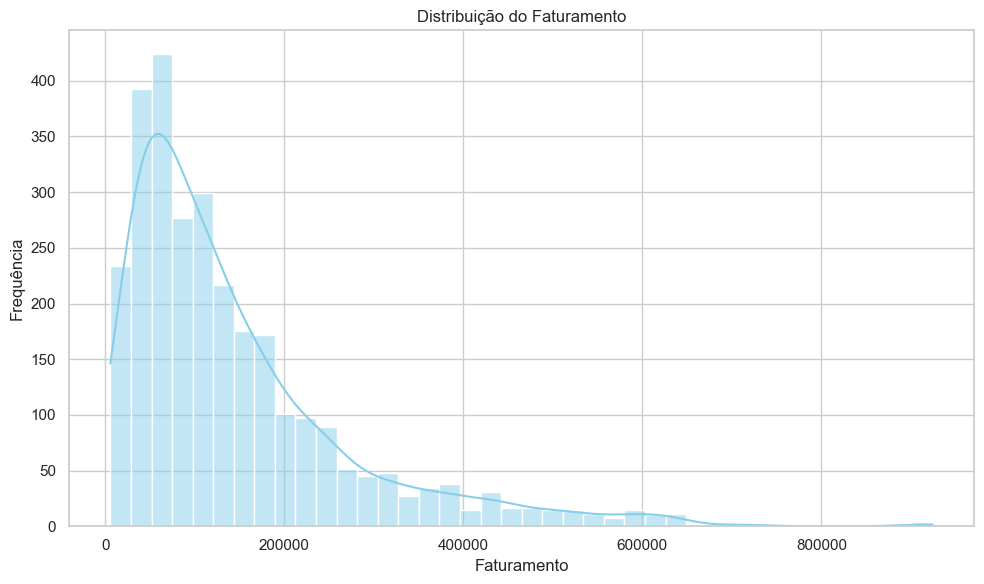

In [32]:
# 2. Distribuição do Faturamento
# ============================
plt.figure(figsize=(10,6))
sns.histplot(df["Faturamento"], bins=40, kde=True, color="skyblue")
plt.title("Distribuição do Faturamento")
plt.xlabel("Faturamento")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

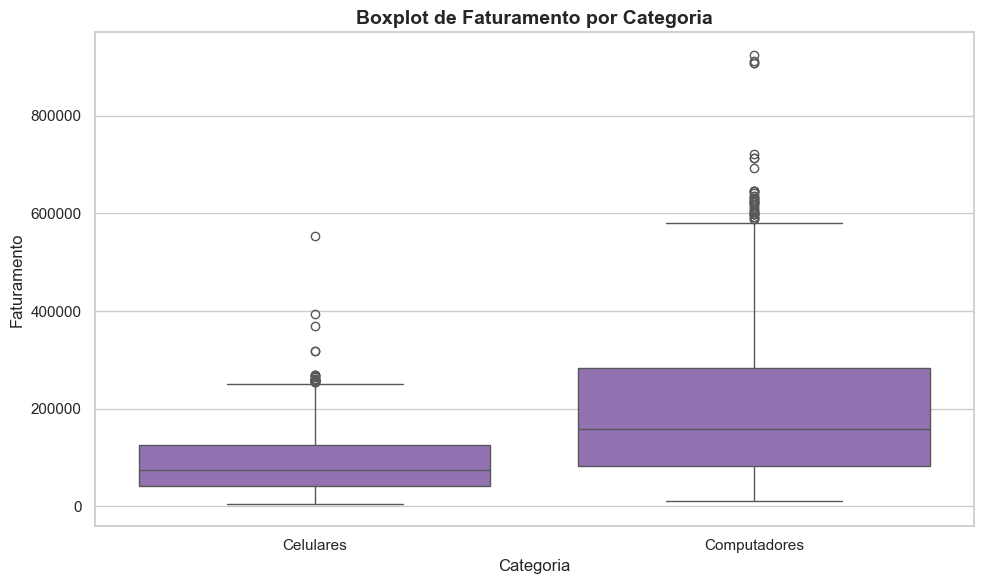

In [33]:
# 3. Faturamento por Categoria (boxplot + média)
# ============================
plt.figure(figsize=(10,6))
# Para evitar o FutureWarning, não use palette se não houver hue
sns.boxplot(data=df, x="Categoria", y="Faturamento", color="tab:purple")
plt.title("Boxplot de Faturamento por Categoria", fontsize=14, fontweight="bold")
plt.xlabel("Categoria")
plt.ylabel("Faturamento")
plt.tight_layout()
plt.show()

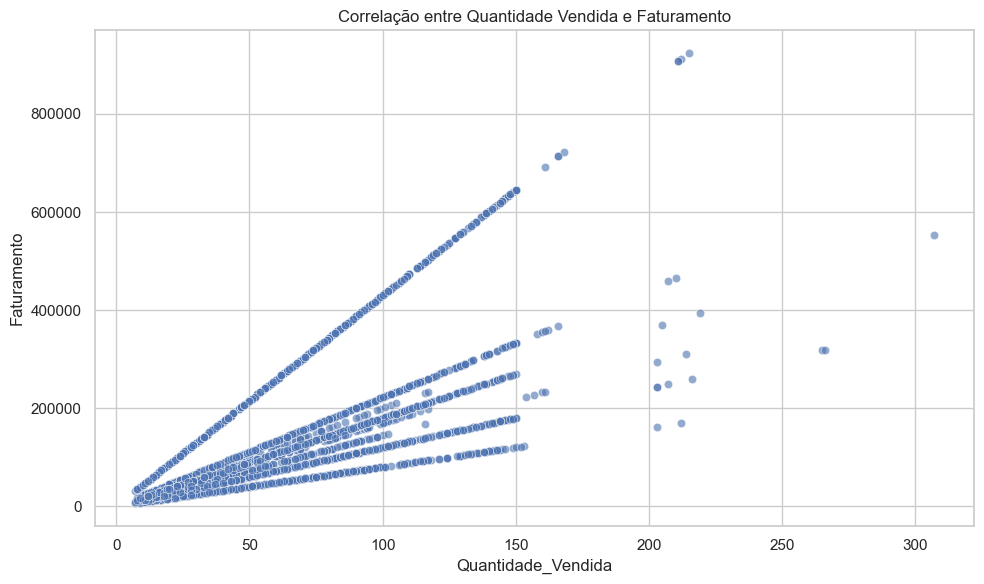

In [34]:
# 4. Correlação Quantidade Vendida x Faturamento
# ============================
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Quantidade_Vendida", y="Faturamento", alpha=0.6)
plt.title("Correlação entre Quantidade Vendida e Faturamento")
plt.tight_layout()
plt.show()

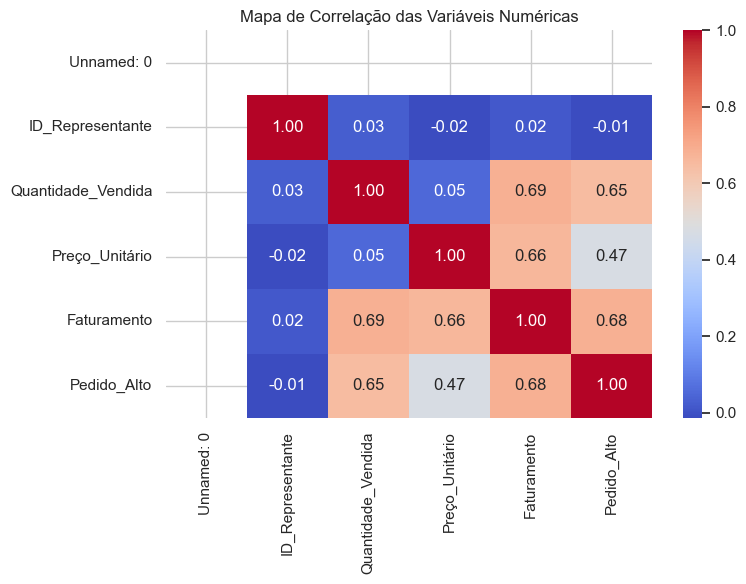

In [35]:
# 5. Heatmap de Correlação
# ============================
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.tight_layout()
plt.show()

In [29]:
# 6A. Criar coluna 'Pedido_Alto' (1 = Alto, 0 = Baixo)
# Usa a mediana do Faturamento como limiar para definir pedidos altos
if "Pedido_Alto" not in df.columns:
    limiar = df["Faturamento"].median()
    df["Pedido_Alto"] = (df["Faturamento"] >= limiar).astype(int)
print("Coluna 'Pedido_Alto' criada com limiar de Faturamento =", limiar)

Coluna 'Pedido_Alto' criada com limiar de Faturamento = 106200.0


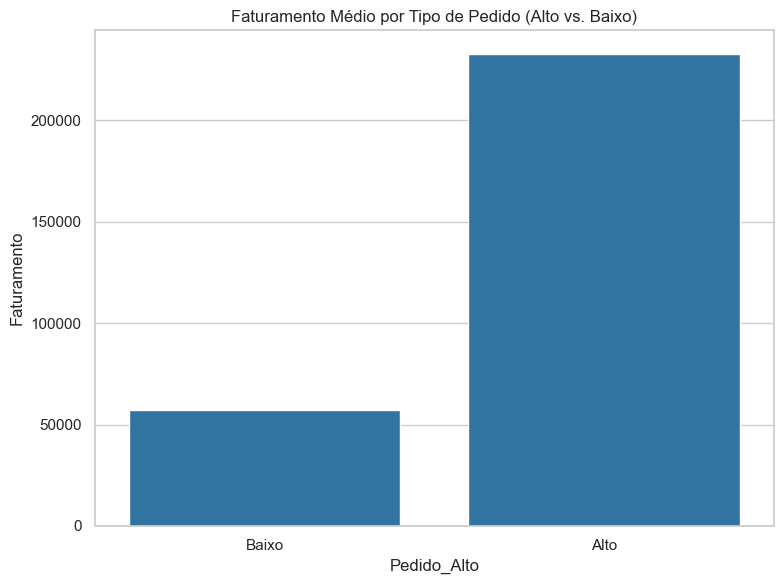

In [38]:
# 6B. Pedido Alto vs. Baixo
# ============================
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Pedido_Alto", y="Faturamento", errorbar=None, color="tab:blue")
plt.title("Faturamento Médio por Tipo de Pedido (Alto vs. Baixo)")
plt.xticks([0,1], ["Baixo", "Alto"])
plt.tight_layout()
plt.show()

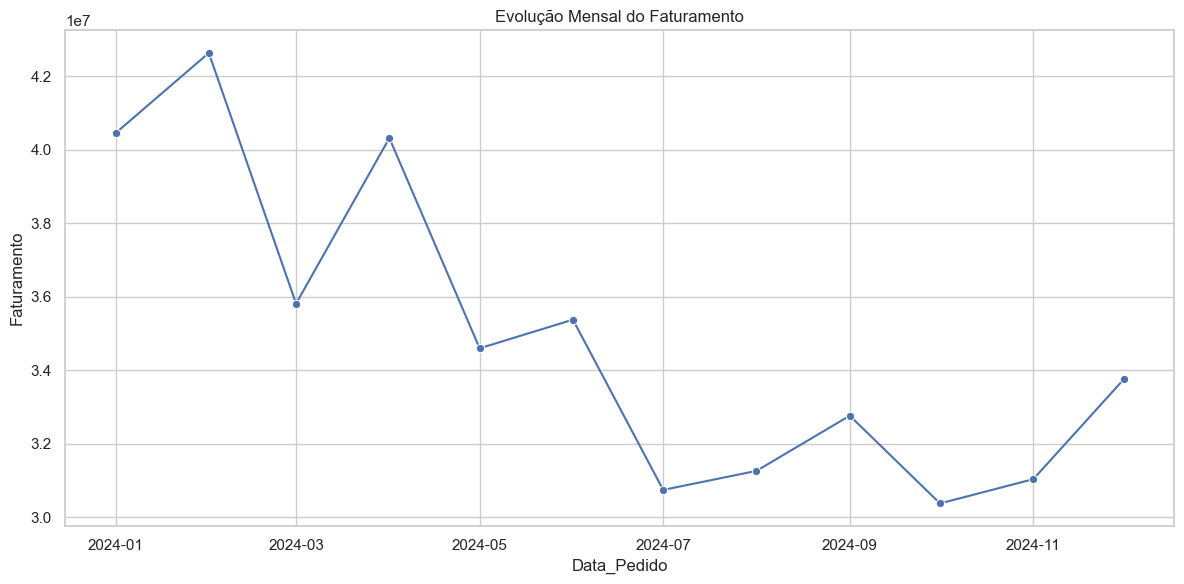

In [39]:
# 7. Evolução Temporal (se existir Data_Pedido)
# ============================
if "Data_Pedido" in df.columns:
    df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], errors="coerce")
    faturamento_mensal = df.groupby(df["Data_Pedido"].dt.to_period("M"))["Faturamento"].sum().reset_index()
    faturamento_mensal["Data_Pedido"] = faturamento_mensal["Data_Pedido"].dt.to_timestamp()

    plt.figure(figsize=(12,6))
    sns.lineplot(data=faturamento_mensal, x="Data_Pedido", y="Faturamento", marker="o")
    plt.title("Evolução Mensal do Faturamento")
    plt.tight_layout()
    plt.show()